# Hand cleaning

# Getting paths

### Imports

In [1]:
%matplotlib qt

import numpy as np
import mne
import glob
import os
mne.set_log_level('ERROR')

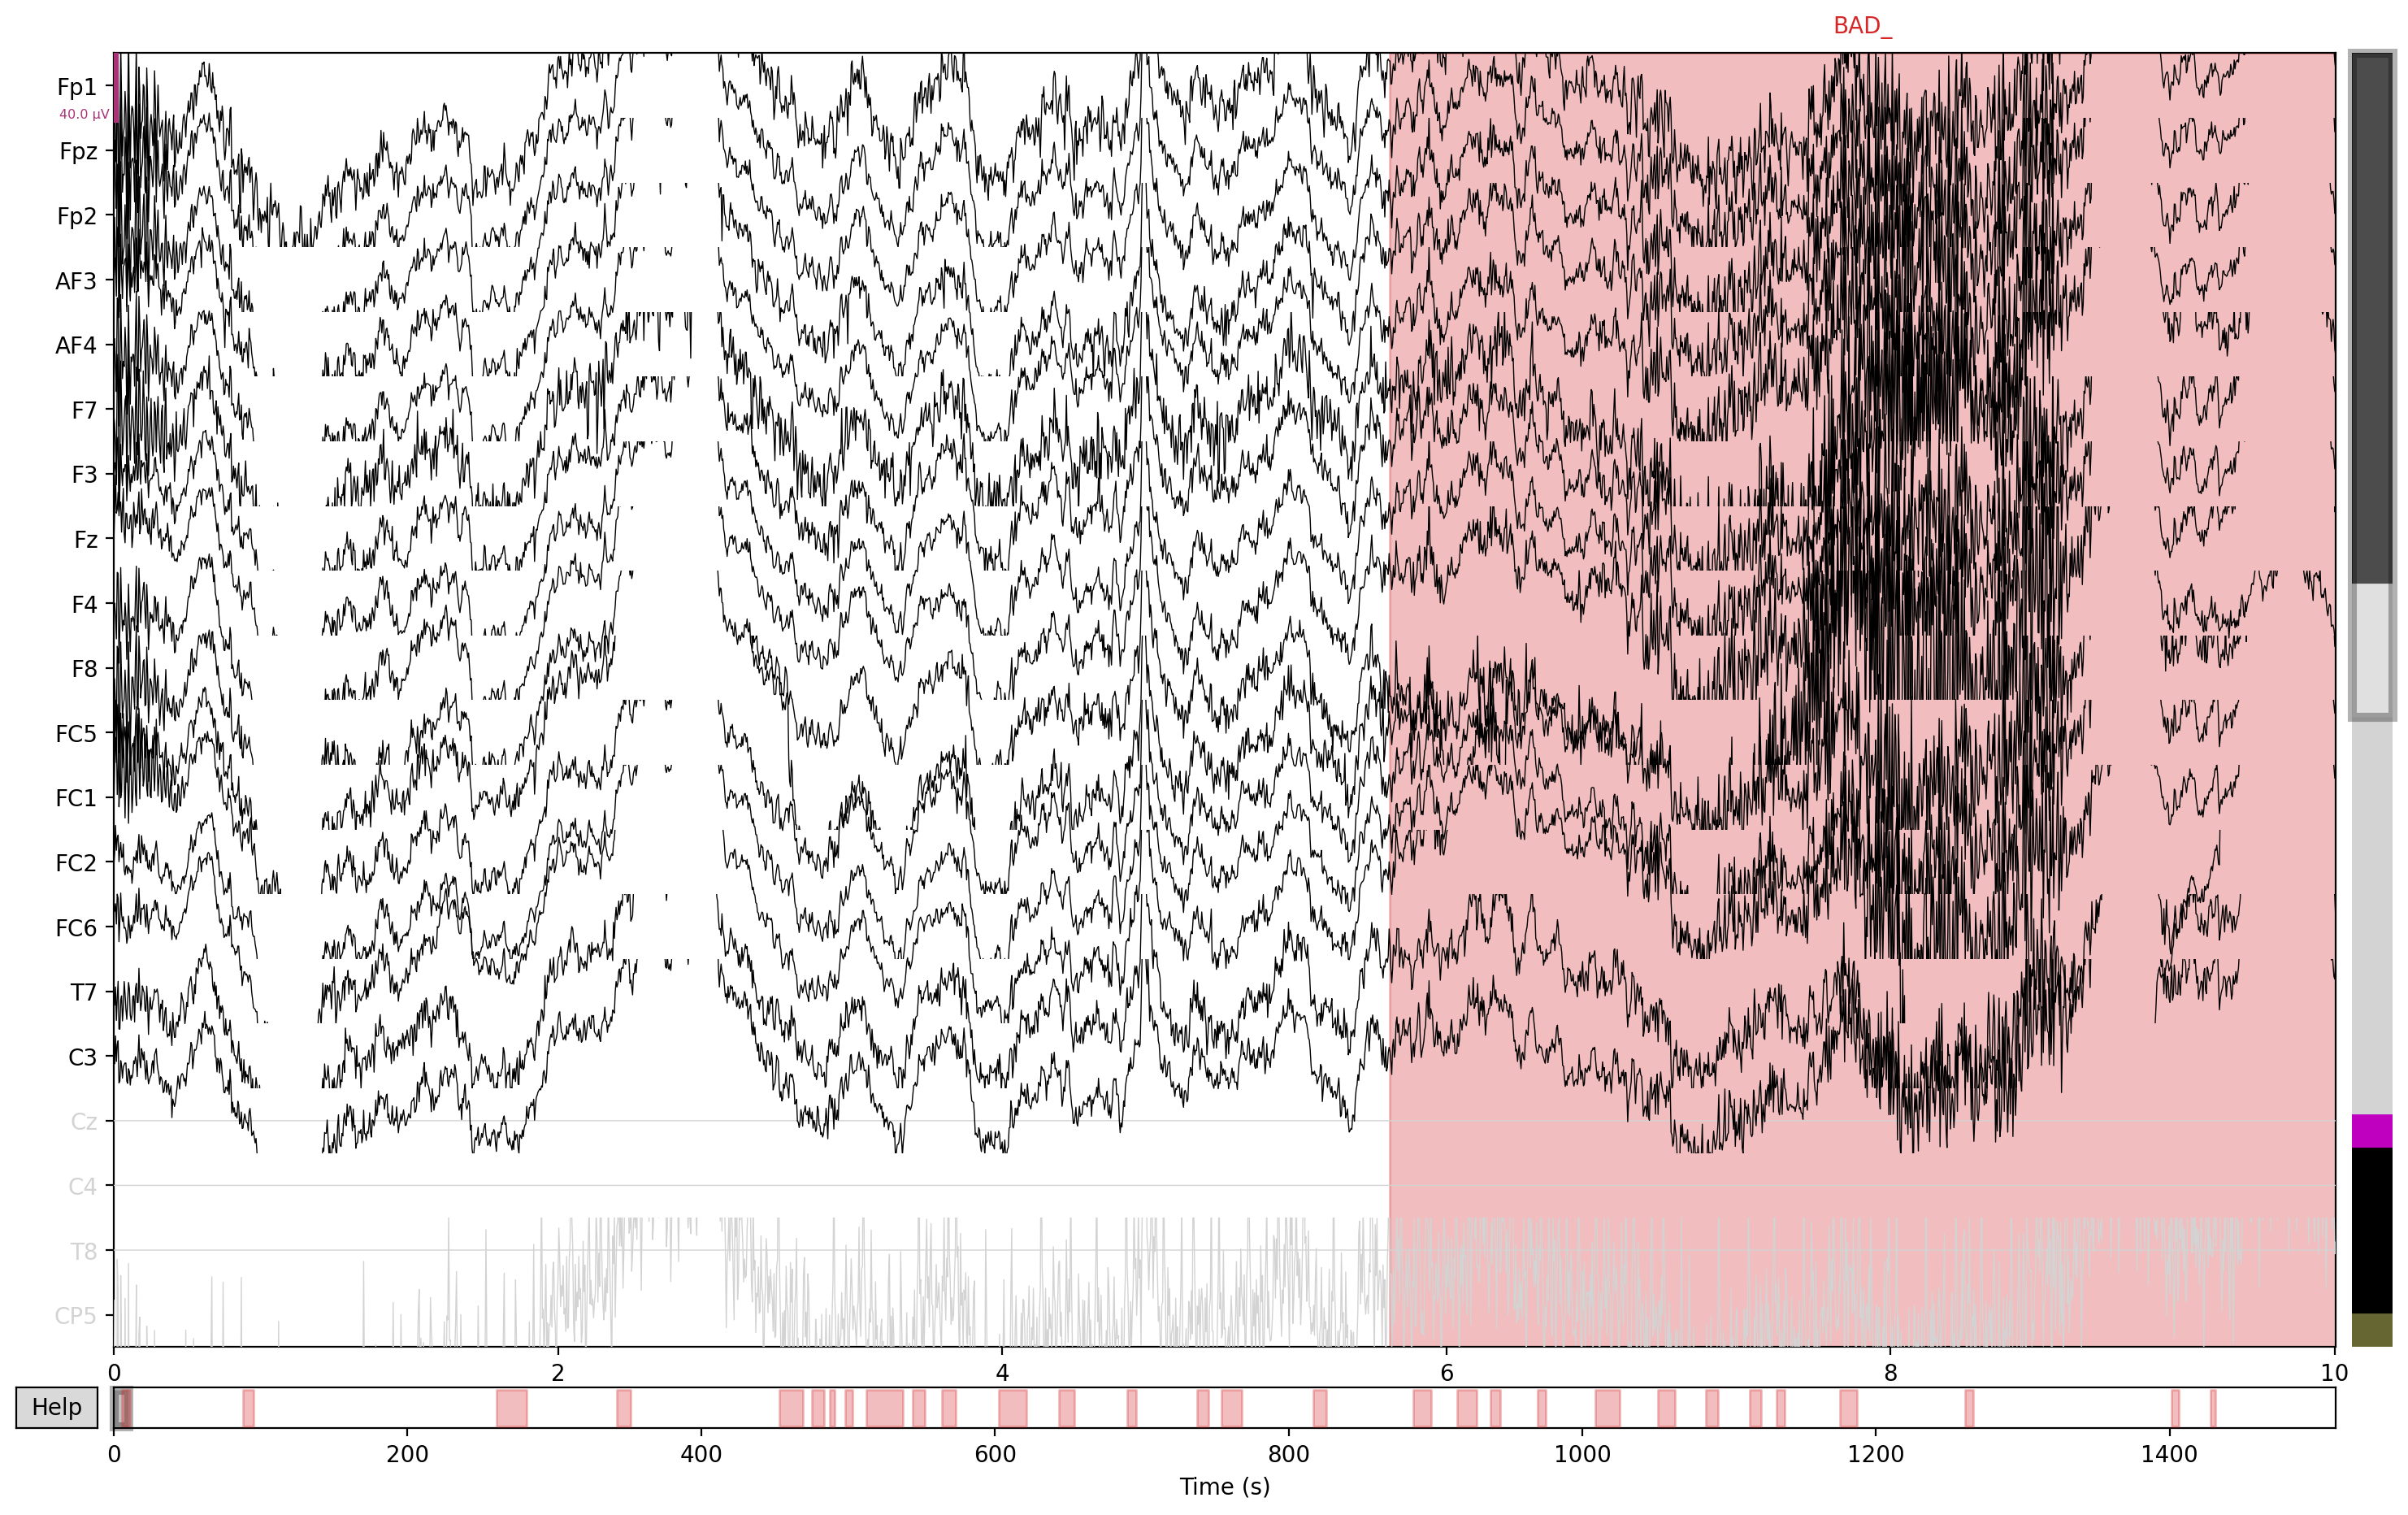

In [7]:
path = '/Users/jonasmago/PhD_code_data/github/eeg_jhana/notebooks/hand_cleaning/resting_state/sub4-day4-jhana-raw.fif'
raw = mne.io.read_raw(path, preload=True)
raw.plot()

### Main Subjects

In [2]:
# # DONE

# # resting state Jhana & Mindfulness
# paths = glob.glob('../../data/mne_raw/sub*-day?-*-raw.fif')
# paths = [path for path in paths if not path.endswith('mmn-raw.fif')]
# paths.sort()

# export_folder = 'resting_state/'

In [3]:
# # DONE

# # rest_baseline
# paths = glob.glob('../../data/mne_raw/sub*-LTP_*-rest_eyes_*-raw.fif')
# paths.sort()

# export_folder = 'rest_baseline/'

In [3]:
# # # mmn
# paths = glob.glob('../../data/mne_raw_events/sub*-day*-*_mmn-raw_phot-events.fif')
# paths.sort()

# export_folder = 'mmn/'

In [3]:
# # ltp
# paths = glob.glob('../../data/mne_raw_events/sub*-LTP_*-*_ltp-raw_phot-events.fif')
# paths.sort()

# export_folder = 'ltp/'

In [259]:
# # rmmn
# paths = glob.glob('../../data/mne_raw_events/sub*-LTP_*-rmmn-raw_phot-events.fif')
# paths.sort()

# export_folder = 'rmmn/'

In [80]:
# rmmn
paths = glob.glob('../../data/mne_raw/sub*-LTP_*-nimitta-raw.fif')
paths.sort()

export_folder = 'nimitta/'


### Control Subjects

In [178]:
# # control_resting_state
# paths = glob.glob('../../data/mne_raw/sub*-control-mindfulness-raw.fif')
# paths = [path for path in paths if not path.endswith('mmn-raw.fif')]
# paths.sort()

# export_folder = 'control_resting_state/'

In [13]:
# # control counting
# paths = glob.glob('../../data/mne_raw/sub*-control-counting-raw.fif')
# paths = [path for path in paths if not path.endswith('mmn-raw.fif')]
# paths.sort()

# export_folder = 'control_counting/'

In [14]:
# # control_mmn
# paths = glob.glob('../../data/mne_raw_events/sub*-control-mindfulness_mmn-raw_phot-events.fif')
# paths.sort()

# export_folder = 'control_mmn/'

# Cleaning Algorythm

In [82]:
raw.save(export_name, overwrite=True)

count = 19

path = paths[count]
basename = os.path.basename(path)
export_name = (export_folder + basename)

try:
    raw = mne.io.read_raw(export_name, preload=True)
except: 
    raw = mne.io.read_raw(path, preload=True)
    raw.crop(tmin=1)
    raw.crop(tmax=np.round(len(raw)/256-1))
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)


    raw.filter(0.3, None)
    raw.notch_filter(freqs=[44, 60, 76, 84, 120])
    raw.notch_filter(freqs=60, notch_widths=1, phase='zero')
    raw.notch_filter(freqs=83.5, notch_widths=1, phase='zero')    
    #raw.notch_filter(freqs=79, notch_widths=1, phase='zero')

    raw.notch_filter(freqs=78.8, notch_widths=1, phase='zero')    
    
scalings = {'eeg': 100e-6}
duration=300
scalings = {'eeg': 40e-6}
duration = 50
raw.plot(scalings=scalings, n_channels=32, duration=duration, highpass=None, lowpass=None)
print("")

2024-11-26 17:02:21.368 Python[31730:4278275] _TIPropertyValueIsValid called with 16 on nil context!
2024-11-26 17:02:21.368 Python[31730:4278275] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-11-26 17:02:21.368 Python[31730:4278275] Text input context does not respond to _valueForTIProperty:
2024-11-26 17:02:23.256 Python[31730:4278275] _TIPropertyValueIsValid called with 16 on nil context!
2024-11-26 17:02:23.256 Python[31730:4278275] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-11-26 17:02:23.257 Python[31730:4278275] Text input context does not respond to _valueForTIProperty:


In [290]:
#raw.compute_psd(remove_dc=True, average='mean', reject_by_annotation=True).plot()
raw.plot_psd(reject_by_annotation=True)
print("")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mne/time_frequency/psd.py:266: UserWarning: nperseg = 2048 is greater than input length  = 1555, using nperseg = 1555
  return _func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mne/time_frequency/psd.py:266: UserWarning: nperseg = 2048 is greater than input length  = 1114, using nperseg = 1114
  return _func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mne/time_frequency/psd.py:266: UserWarning: nperseg = 2048 is greater than input length  = 1929, using nperseg = 1929
  return _func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mne/time_frequency/psd.py:266: UserWarning: nperseg = 2048 is greater than input length  = 1714, using nperseg = 1714
  return _func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/

In [5]:
raw.save(export_name, overwrite=True)

In [84]:
scalings = {'eeg': 20e-6}
raw.plot(scalings=scalings, n_channels=32, duration=6, highpass=None, lowpass=None)
print("")

In [71]:
scalings = {'eeg': 40e-6}
raw.plot(scalings=scalings, n_channels=32, duration=120, highpass=None, lowpass=None)
print("")

In [405]:
scalings = {'eeg': 80e-6}
raw.plot(scalings=scalings, n_channels=32, duration=600, highpass=None, lowpass=None)
print("")

In [296]:
scalings = {'eeg': 120e-6}
raw.plot(scalings=scalings, n_channels=32, duration=1500, highpass=None, lowpass=None)
print("")

In [470]:
#raw.notch_filter(freqs=[44])
#raw.notch_filter(freqs=83, notch_widths=1, phase='zero')    
#raw.notch_filter(freqs=79, notch_widths=1, phase='zero')    

raw.notch_filter(freqs=78.8, notch_widths=1, phase='zero')    
print("")

In [285]:
#raw.notch_filter(freqs=82.8, notch_widths=1, phase='zero')    
print("")

In [73]:
raw.save(export_name, overwrite=True)

# OTHER STUFF

In [404]:
raw.set_eeg_reference('average')


<Raw | sub9-day1-mindfulness_mmn-raw_phot-events.fif, 39 x 216065 (844.0 s), ~64.3 MB, data loaded>

In [881]:
raw_filtered = raw.set_eeg_reference(ref_channels='average')
#raw_filtered.plot_psd()
print("")

In [449]:
tmp = mne.make_fixed_length_epochs(raw, duration=2, preload=True, reject_by_annotation=True)

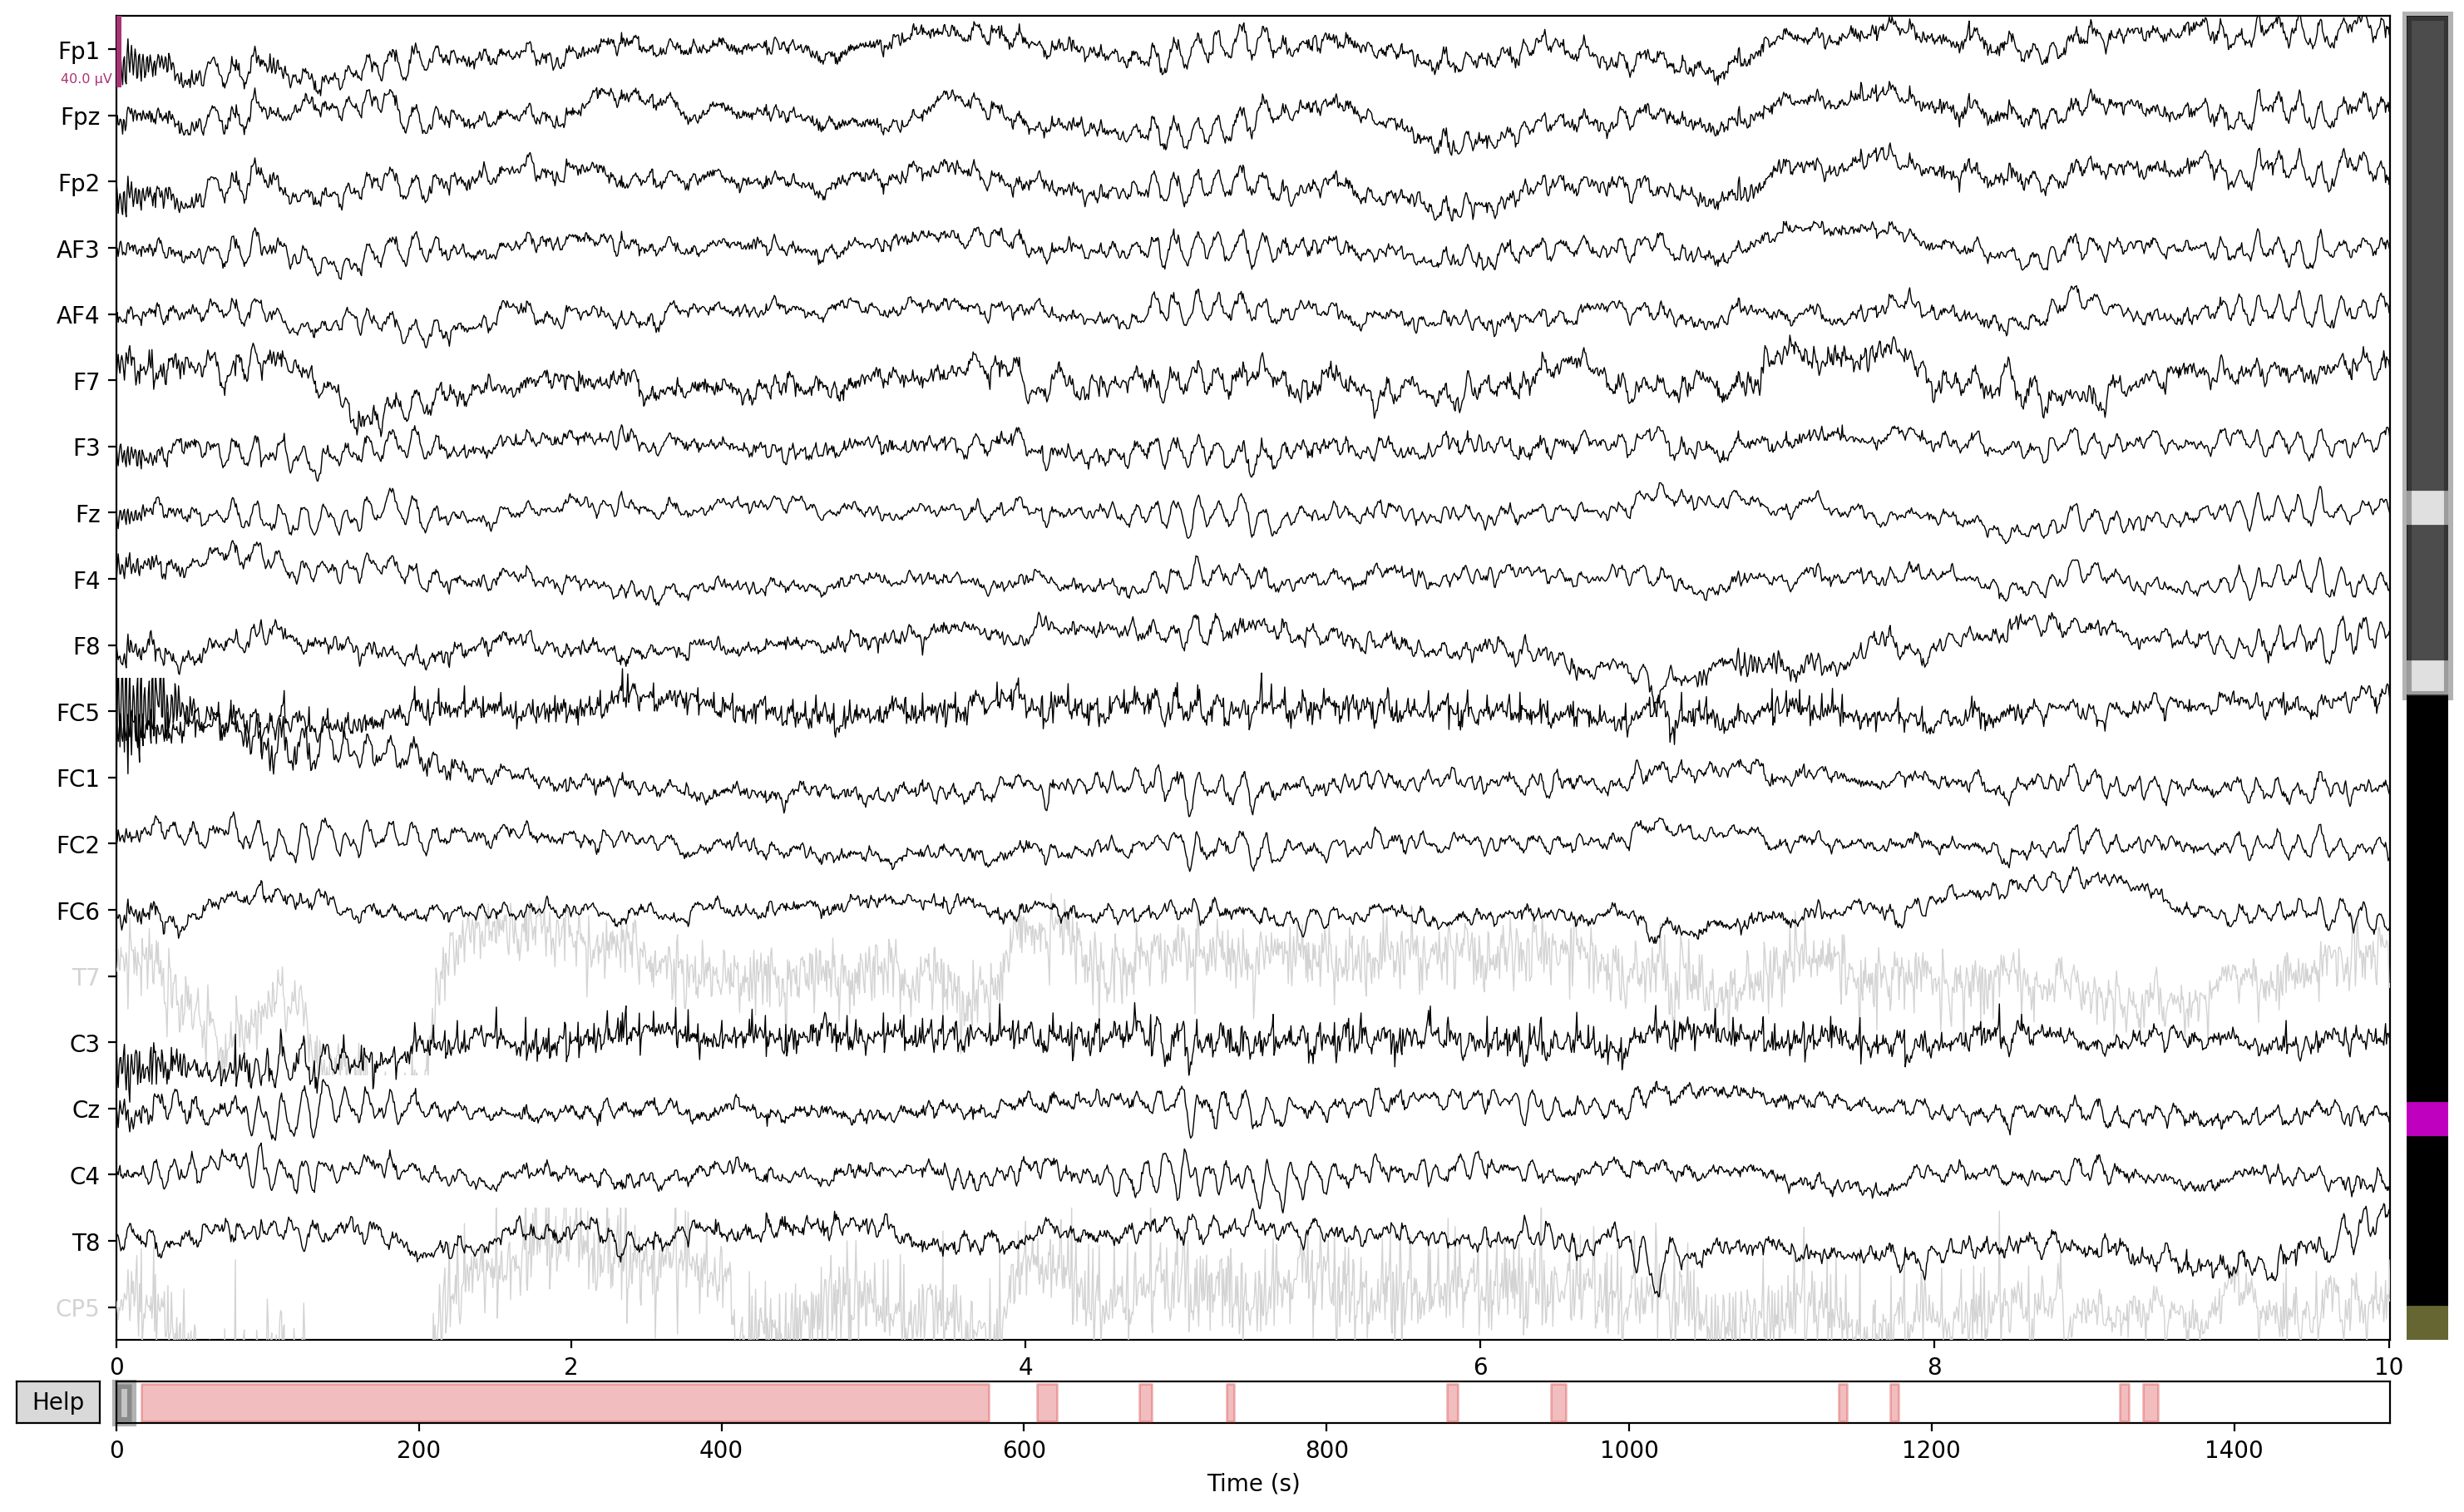

In [882]:
raw_filtered.plot()

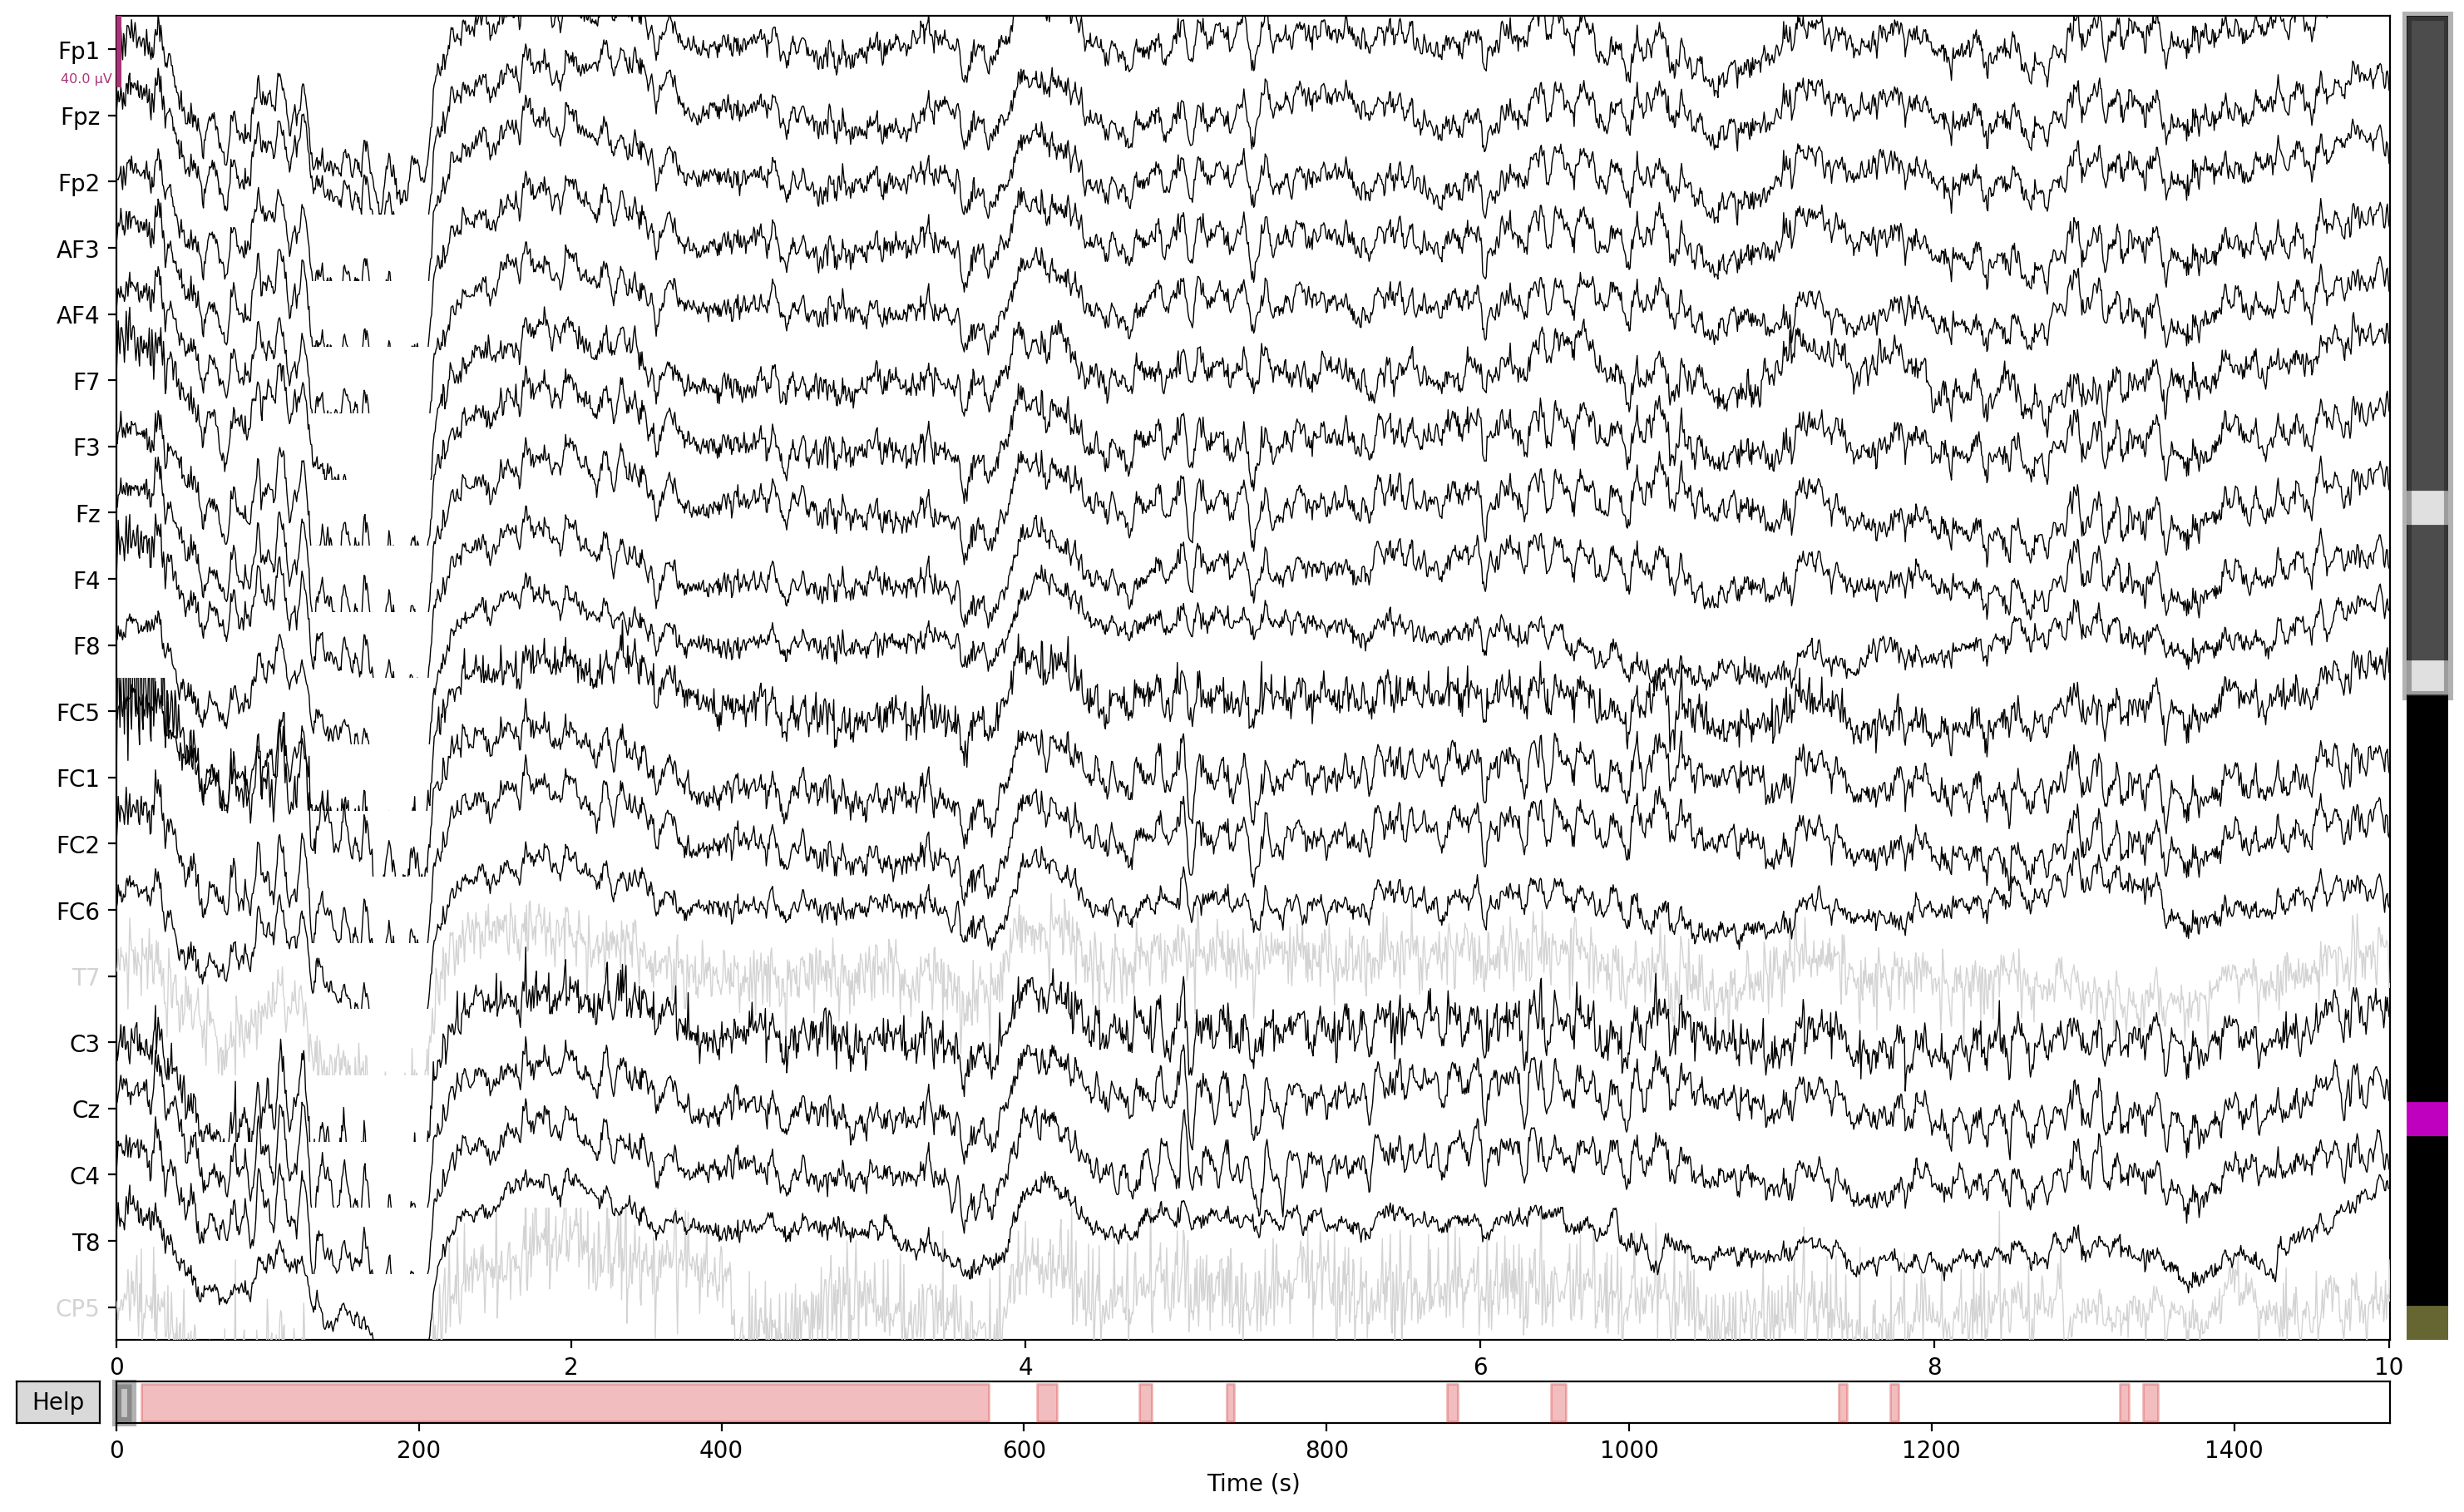

In [880]:
raw.plot()

## Checking

In [7]:
paths = glob.glob('*/*')
paths.sort()

In [186]:
paths[counter]

'../../data/mne_raw/sub1-day4-jhana-raw.fif'

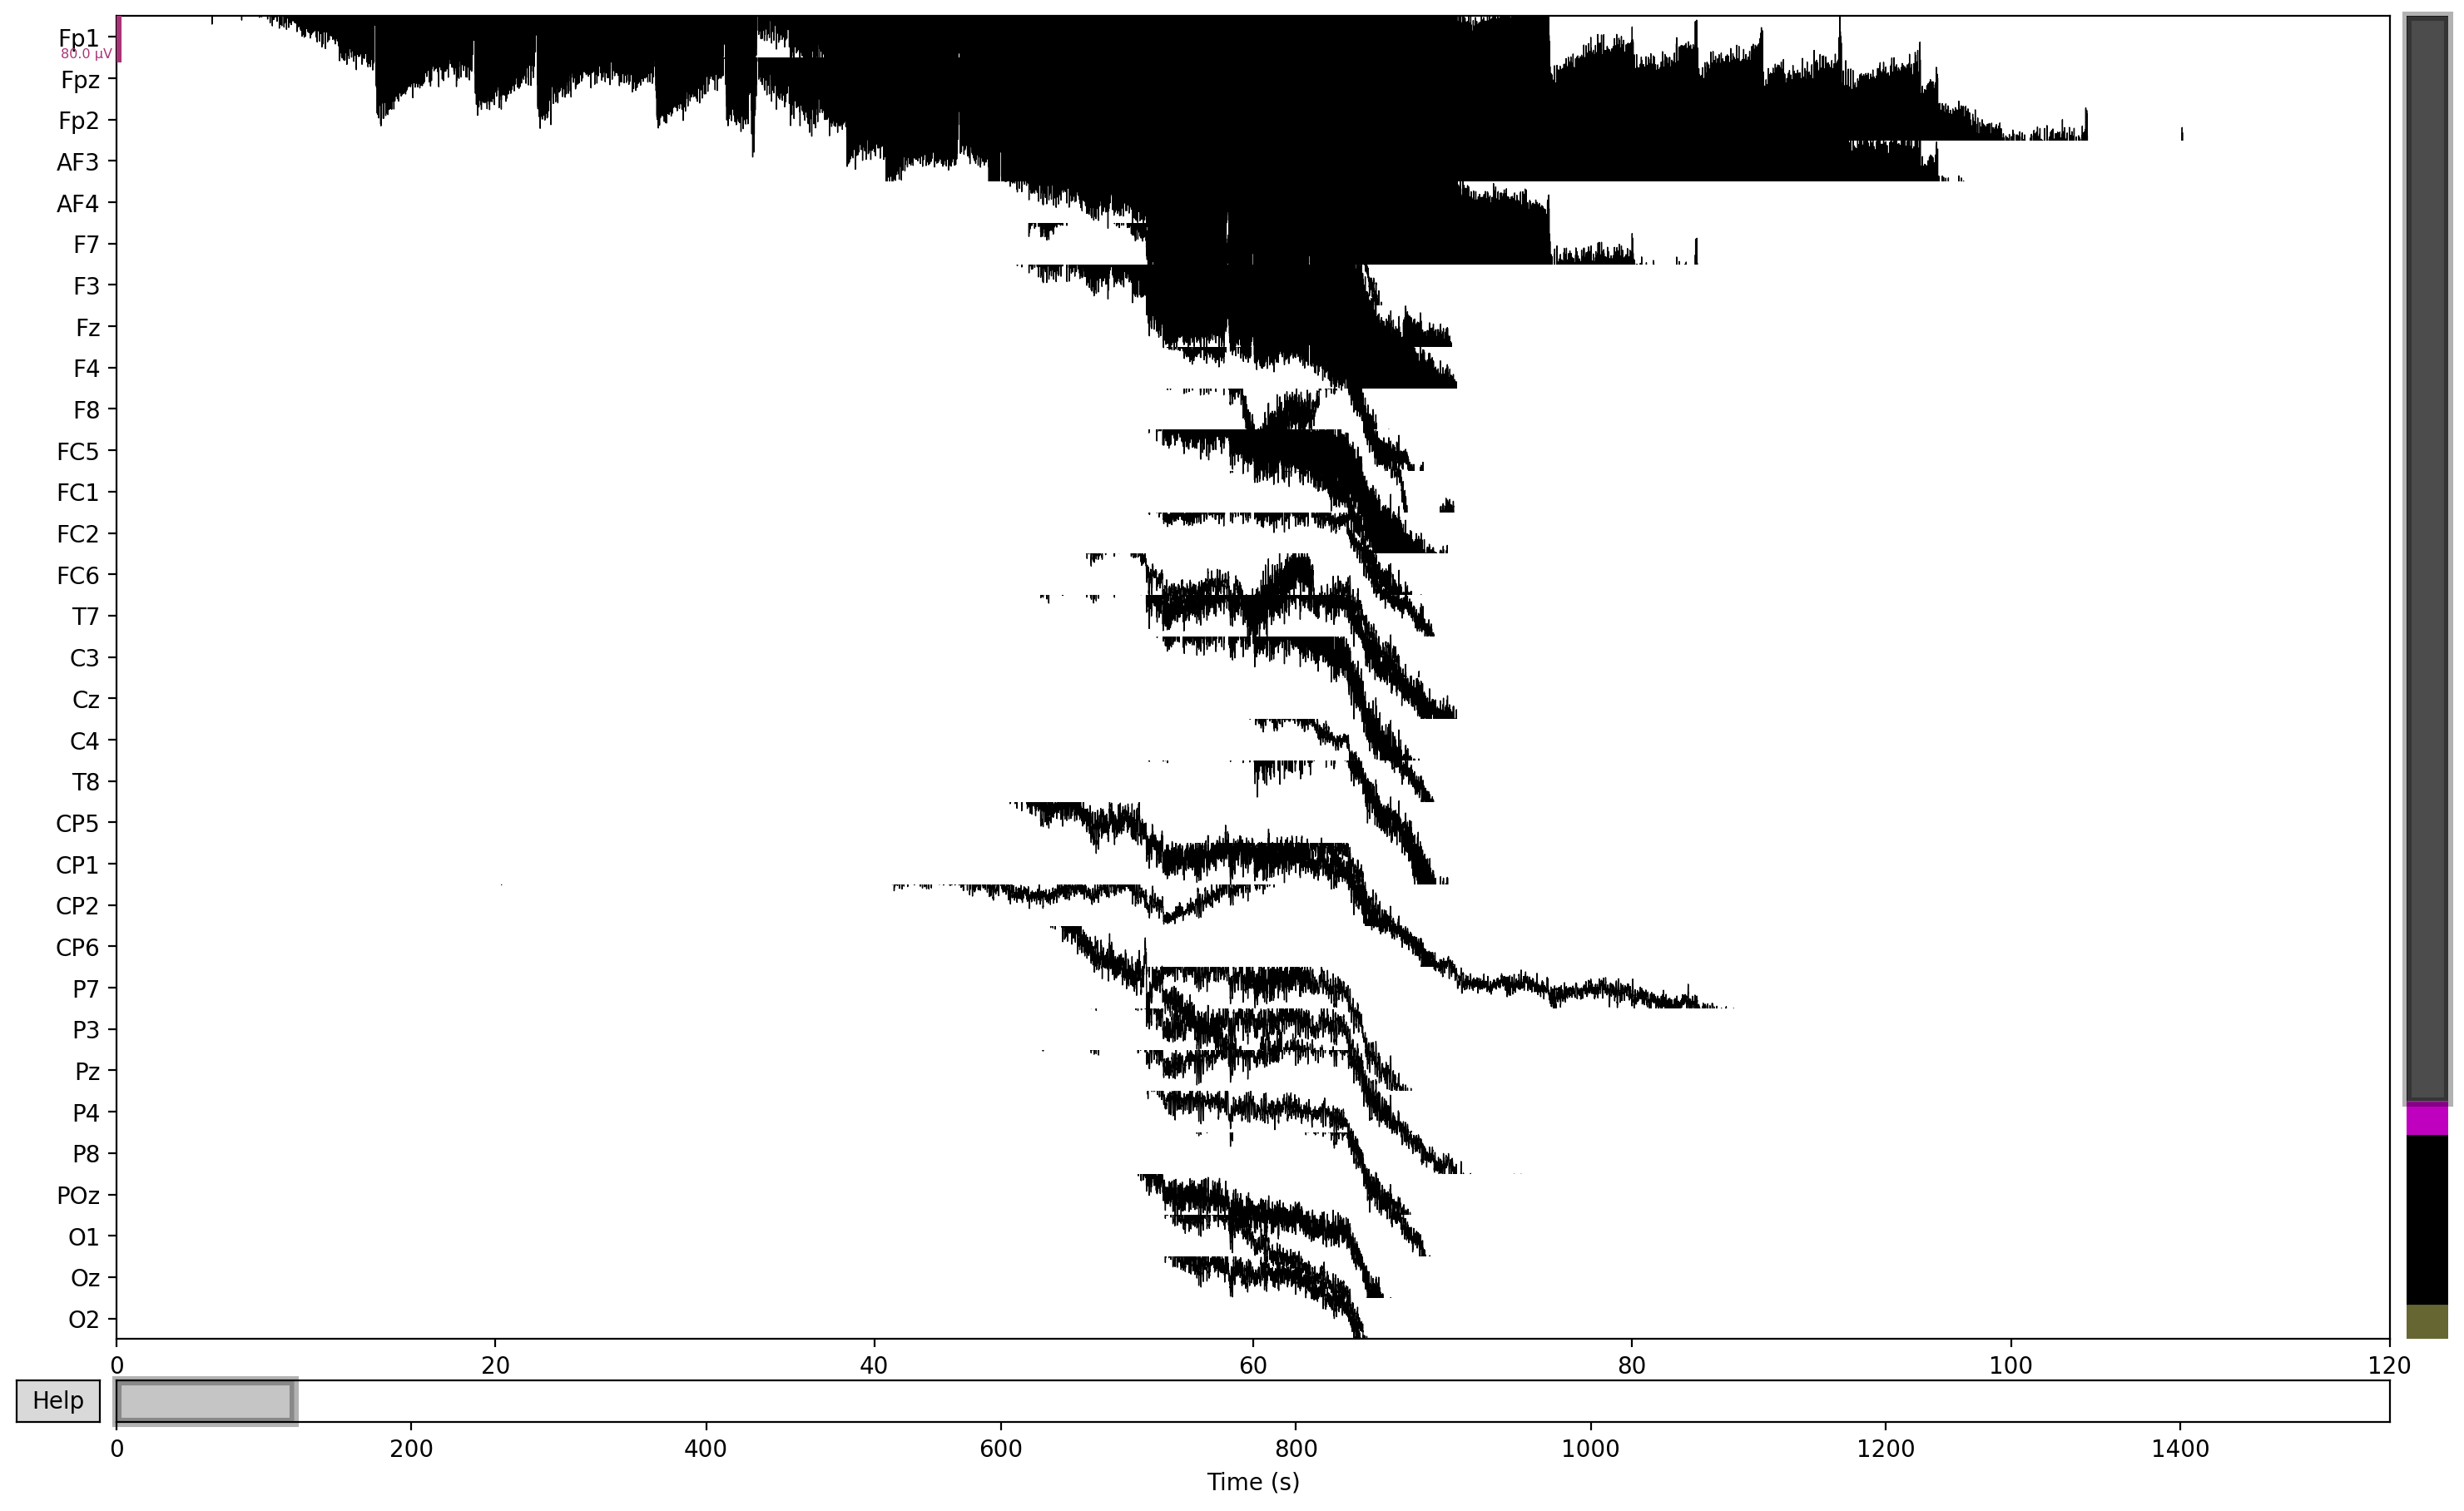

In [185]:
counter = 14
raw = mne.io.read_raw(paths[counter], preload = True)
scalings = {'eeg': 40e-6}
raw.plot(scalings=scalings, n_channels=32, duration=120, highpass=None, lowpass=None)

## Names

In [ ]:
paths = glob.glob('../../data/mne_raw/sub*-day?-*-raw.fif')
paths = [path for path in paths if not path.endswith('mmn-raw.fif')]
export_folder = 'resting_state/'

paths = glob.glob('../../data/mne_raw_events/sub*-day?-*_mmn-raw_phot-events.fif')
export_folder = 'mmn/'


paths = glob.glob('../../data/mne_raw/sub*-control-counting-raw.fif')
paths = glob.glob('../../data/mne_raw/sub*-control-mindfulness-raw.fif')
paths = glob.glob('../../data/mne_raw_events/sub*-control-mindfulness_mmn-raw_phot-events.fif')

"mne_raw_events"
sub0-LTP_pre-baseline_ltp-raw_phot-events.fif
sub0-LTP_pre-early_ltp-raw_phot-events.fif
sub0-LTP_pre-late_ltp-raw_phot-events.fif
sub0-LTP_pre-rmmn-raw_phot-events.fif

sub0-LTP_post-baseline_ltp-raw_phot-events.fif
sub0-LTP_post-early_ltp-raw_phot-events.fif
sub0-LTP_post-late_ltp-raw_phot-events.fif
sub0-LTP_post-rmmn-raw_phot-events.fif


"mne_raw"
sub0-LTP_pre-baseline_ltp-raw.fif
sub0-LTP_pre-nimitta-raw.fif
sub0-LTP_pre-rest_eyes_closed-raw.fif
sub0-LTP_pre-rest_eyes_open-raw.fif

sub0-LTP_post-baseline_ltp-raw.fif
sub0-LTP_post-nimitta-raw.fif
sub0-LTP_post-rest_eyes_closed-raw.fif
sub0-LTP_post-rest_eyes_open-raw.fif

